In [98]:
import requests
from bs4 import BeautifulSoup
import re
import unidecode
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import time

# Задание 1


Дано: [Сайт Библио-Глобуса](https://www.biblio-globus.ru)

Если сайт Библио-Глобуса помрет, то можно [сайт Читай-Города](https://www.chitai-gorod.ru)


Задание: средствами парсинга ответить на список вопросов ниже


1) Какова в среднем длина (в страницах) книги из категории классическая литература в ассортименте магазина?

2) Какое у этих книг распределение цен? (попробуйте нарисовать [гистограмму](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

3) Как соотносятся средние цены книг по Python, Машинному обучению и C++ ? (поясните, как именно вы доставали такие книги :), то есть "я буду доставать книги вот так, потому что...")


In [74]:
def get_html (url: str):
    r = requests.get(url, verify=False)

    soup = BeautifulSoup(r.text)
    return soup

In [86]:
def Average(lst): 
    return sum(lst) / len(lst)

In [91]:
classical_books = []
book_prices = []

for page in range(1, 11):
    catalog_url = "https://www.chitai-gorod.ru/catalog/books/klassicheskaya-proza-110003?page=" + str(page) + "&filters%5Bcategories%5D=110003"

    page_html = get_html(catalog_url)

    for data in page_html.find_all("a", class_="product-card__rating product-card__row"):
        classical_books.append(data['href'])

    for i in page_html.find_all("div", class_="product-price__value product-price__value--discount"):
        i = i.get_text(strip=True).replace(' ₽', '')
        i = unidecode.unidecode(i)
        i = i.replace(' ', '')
        book_prices.append(int(i))

    

In [107]:
num_of_pages = []
count = 0

for page_path in classical_books:
    count += 1
    book_url = 'https://www.chitai-gorod.ru' + page_path

    book_page = get_html(book_url)

    num_of_pages.append(int(book_page.find("span", itemprop="numberOfPages").get_text(strip=True)))
    
    if count > 50:
        time.sleep(10)
        continue

AttributeError: 'NoneType' object has no attribute 'get_text'

*Постоянно блокирует подключение. Не понимаю с чем именно связано, но думаю, что идея парсинга понятна :)*

### 1) Какова в среднем длина (в страницах) книги из категории классическая литература в ассортименте магазина?

In [108]:
Average(num_of_pages)

527.6842105263158

### 2) Какое у этих книг распределение цен?

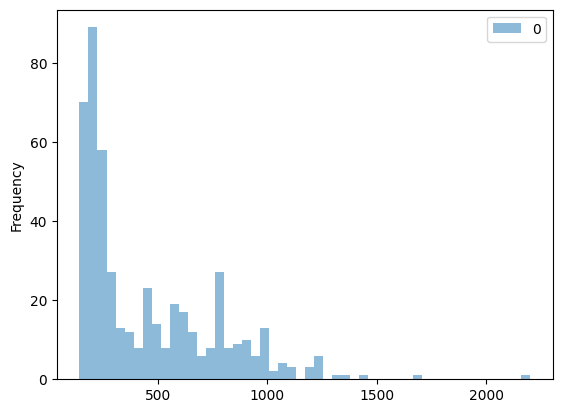

In [106]:
book_prices_df = pd.DataFrame(data=book_prices)

ax = book_prices_df.plot.hist(bins=50, alpha=0.5)

# Задание 2 про перевод из camel_case'a в snake_case

Дано произвольное название, написанное в camelCase, перевести его в snake_case

In [114]:
import re
v = 'camelCaseVar'
#должно превратиться в camel_case_var

snake_case = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', v).lower()
snake_case

'camel_case_var'

## Задание 3, Про время 

Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. 
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

Ввод:

    Уважаемые! Если вы к 09:00 не вернёте 
    чемодан, то уже в 09:00:01 я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!
    
Вывод:

    Уважаемые! Если вы к (TBD) не вернёте 
    чемодан, то уже в (TBD) я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!

In [117]:
inp = """Уважаемые! Если вы к 09:00 не вернёте 
чемодан, то уже в 09:00:01 я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!"""

In [118]:
re.sub(r"\d{2}:\d{2}(:\d{2})?", "(TBD)", inp)

'Уважаемые! Если вы к (TBD) не вернёте \nчемодан, то уже в (TBD) я за себя не отвечаю. \nPS. С отношением (TBD) всё нормально!'

# Задание 4 Про отчетность 

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо. 
Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

    Было закуплено 12 единиц техники 
    по 410.37 рублей.
    
Вывод:

    Было закуплено 1728 единиц техники 
    по 68921000.50653 рублей.

In [120]:
test = "Было закуплено 12 единиц техники по 410.37 рублей."

In [4]:
# Для решения вероятно в функцию sub надо будет пихать другую функцию. Пример "как это делать"

import re

def convert_func(matchobj):
    m =  matchobj.group(0)
    map = {'7': 'seven',
           '8': 'eight',
           '9': 'nine'}
    return map[m]

line = "7 ate 9"
new_line =  re.sub("[7-9]", convert_func, line)

new_line

'seven ate nine'

In [122]:
def anonimizer (matchobj):
    m = int(matchobj.group(0)) ** 3
    return str(m)


re.sub(r"\d+", anonimizer, test)

'Было закуплено 1728 единиц техники по 68921000.50653 рублей.'

# Задание 5. Про NumPy и SVD

[Почитать про SVD - 1](http://timbaumann.info/svd-image-compression-demo/)

Сожмите картинку во всех трех каналах с помощью SVD (R,G и B) и оцените, сколько нужно компонент, чтобы получилось вменяемое качество. А сколько мы при этом экономим места?

[Как жать все 3 канала](https://www.kaggle.com/code/paulbacher/practical-applications-to-svd-on-rgb-images/notebook)

In [123]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

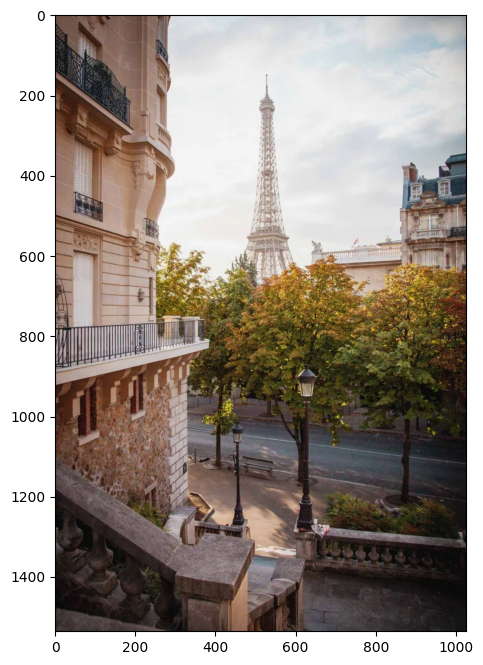

In [125]:
image = Image.open('Avenue-de-Camoens-Paris-Eiffel-Tower.png')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()